In [1]:
import os
import warnings
warnings.filterwarnings(action='ignore')

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt


# Download dataset

In [2]:
!wget https://zenodo.org/record/1003066/files/MuMu_dataset.tar.gz?download=1
!tar -xvf MuMu_dataset.tar.gz\?download\=1

--2021-11-09 11:04:47--  https://zenodo.org/record/1003066/files/MuMu_dataset.tar.gz?download=1
Resolving zenodo.org (zenodo.org)... 137.138.76.77
Connecting to zenodo.org (zenodo.org)|137.138.76.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 166173095 (158M) [application/octet-stream]
Saving to: ‘MuMu_dataset.tar.gz?download=1’

MuMu_dataset.tar.gz 100%[===================>] 158.47M  3.47MB/s    in 99s     

2021-11-09 11:06:39 (1.60 MB/s) - ‘MuMu_dataset.tar.gz?download=1’ saved [166173095/166173095]

MuMu_dataset/
MuMu_dataset/MuMu_dataset_single-label.csv
MuMu_dataset/MuMu_dataset_multi-label.csv
MuMu_dataset/amazon_metadata_MuMu.json
MuMu_dataset/amazon_reviews_MuMu.json


# Check single & multi label csv

In [3]:
single_data = pd.read_csv("./MuMu_dataset/MuMu_dataset_single-label.csv", sep=",", index_col=0)
single_data

,album_mbid,MSD_track_id,recording_mbid,artist_mbid,genres
amazon_id,,,,,
B0018ZB6ZO,0164b5ce-42f8-46bf-b140-61ecd2ed449e,TRYDUXK12903CE0C37,66dd470f-4c4f-4caa-b8d4-2ebc80a83cb6,7434b85a-4a06-42ba-9e1d-9c568c044842,Dance & Electronic
B0018ZB6ZO,0164b5ce-42f8-46bf-b140-61ecd2ed449e,TRGWXYX128F426E27F,b45aef36-c3a3-42f2-90fb-728e8b3c54a2,7434b85a-4a06-42ba-9e1d-9c568c044842,Dance & Electronic
B000003HGR,7fe6e337-9115-3719-855b-0441c42a2c36,TRVMIIJ12903CDBF1D,36b15f42-b441-4d64-8ba9-ca264ed1c6f1,1b54e90c-638e-4fdd-a20e-4ab09db9fdaf,Alternative Rock
B000003HGR,7fe6e337-9115-3719-855b-0441c42a2c36,TRDHJVA128F9335634,279fabb3-830e-4d04-86d5-53668bc42bfa,1b54e90c-638e-4fdd-a20e-4ab09db9fdaf,Alternative Rock
B000003HGR,7fe6e337-9115-3719-855b-0441c42a2c36,TRKDLHL12903CDBF32,381b90e1-c07f-4a53-be8c-6a2107d7a17f,1b54e90c-638e-4fdd-a20e-4ab09db9fdaf,Alternative Rock
...,...,...,...,...,...
B000GRU732,f9dd2e53-45f6-3ed1-b7bb-090c9e5abbeb,TRLWWDS128F4244824,991d3087-edfd-48fc-a8f9-ce5308f97243,8ef27ebb-f741-4ddf-bf5d-61a6bb981eca,Dance & Electronic
B000GRU732,f9dd2e53-45f6-3ed1-b7bb-090c9e5abbeb,TRIUYMM128F424481D,a6b3f48a-d820-4405-9eee-937d9fa7ca07,8ef27ebb-f741-4ddf-bf5d-61a6bb981eca,Dance & Electronic
B0032EZCBS,737d53f7-b603-486e-bd13-b3e079406343,TRVSDNO12903CC37B0,ef2fd4ae-3ec0-4b6d-a156-e81a6f9ea5ea,89ad4ac3-39f7-470e-963a-56509c546377,Dance & Electronic


In [4]:
# Will use only single-label data first.

# multi_data = pd.read_csv("./MuMu_dataset/MuMu_dataset_multi-label.csv", sep=",", index_col=0)
# multi_data

In [5]:
amazon_meta = pd.read_json("./MuMu_dataset/amazon_metadata_MuMu.json")
total_data_num = len(amazon_meta)
amazon_meta

,title,price,artist,imUrl,amazon_id,related,label,release-group_mbid,artist_url,artist_mbid,categories,salesRank,brand
0,Comfort Zone,20.69,Liz Ramirez,http://ecx.images-amazon.com/images/I/51fdvJLW...,1458389375,"{'also_bought': [], 'buy_after_viewing': []}",SoulTechMusic,20dc12c8-3c47-4fdc-8d40-dafe88452942,/s?ie=UTF8&field-artist=Liz+Ramirez&search-ali...,37986d18-e8af-4502-8e08-2a87d7e5853f,"[[CDs & Vinyl, Jazz], [CDs & Vinyl, Pop]]",NaN,NaN
1,Kirtan,22.94,Jai Uttal,http://ecx.images-amazon.com/images/I/51GGK0zo...,1591791065,"{'also_bought': ['B001QSER54', 'B00020HDXU', '...",Sounds True,cb6b590f-2656-385f-ac33-b4abfd6b1498,/Jai-Uttal/e/B000AP6Z0Y,eb6f3fca-c40c-4740-b288-a7f5744c6cec,"[[CDs & Vinyl, Classical], [CDs & Vinyl, New A...",{'Music': 89340},NaN
2,Rough Guide to Gypsy Music,21.50,Rough Guide to Gypsy Music (Second Edition),http://ecx.images-amazon.com/images/I/51Li1pqK...,1906063443,"{'also_bought': ['B0001AV59O'], 'buy_after_vie...",Edge Unknown Vendors,b6326270-e12f-4592-9f09-2761580104cf,/s?ie=UTF8&field-artist=Rough+Guide+to+Gypsy+M...,89ad4ac3-39f7-470e-963a-56509c546377,"[[CDs & Vinyl, Christian], [CDs & Vinyl, Pop],...",{'Music': 337752},NaN
3,Making Lite of Myselrf,16.78,John Pinette,http://ecx.images-amazon.com/images/I/51eW8XLF...,1929243766,"{'also_bought': ['B00000AE86', 'B001PWY4I6', '...",Uproar,bea4a603-56bf-40bf-8dd0-8ae2a2f286cc,/s?ie=UTF8&field-artist=John+Pinette&search-al...,8e4ad58b-de31-47e0-9a7e-da64a4575858,"[[CDs & Vinyl, Comedy & Spoken Word], [CDs & V...",{'Music': 16578},NaN
4,In the Quiet,21.15,John G. Elliott,http://ecx.images-amazon.com/images/I/41F5hqeP...,1930864159,"{'also_bought': [], 'buy_after_viewing': []}",CD Baby,62574283-6645-3caf-8faf-2968a663d983,/John-G.-Elliott/e/B001LIAPKU,5d8cd98d-0572-4fe8-8771-84b4eb9bf510,"[[CDs & Vinyl, Christian, Pop & Contemporary],...",{'Music': 102498},NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31466,NaN,NaN,Panteon Rococo,http://ecx.images-amazon.com/images/I/21o%2B73...,B00JVSIMLQ,"{'also_bought': [], 'buy_after_viewing': []}",Imports,4c8b2d58-e768-45bb-b9c7-a406f8379c17,/s?ie=UTF8&field-artist=Panteon+Rococo&search-...,8536d91f-d976-4578-9776-9376a004e4f0,"[[CDs & Vinyl, Latin Music, Latin Pop]]",{'Music': 1217044},NaN
31467,NaN,NaN,Gravis Sung,http://ecx.images-amazon.com/images/I/316q03mN...,B00KDL9TTE,"{'also_bought': [], 'buy_after_viewing': []}",CD Baby,4673f8b4-e872-3352-8730-2a1d034aadad,/s?ie=UTF8&field-artist=Gravis+Sung&search-ali...,4aaf6eb8-c44e-42d1-b99b-3ebf87325dc4,"[[CDs & Vinyl, Pop, Easy Listening]]",NaN,NaN
31468,NaN,34.45,Marisa Monte,http://ecx.images-amazon.com/images/I/51UgnZe%...,B00KE5M5IQ,"{'also_bought': [], 'bought_together': ['B00K6...",Imports,80bc8946-0760-4036-9139-65d05a61bcff,/Marisa-Monte/e/B000APAL7M,f81f19b9-c76e-43ac-8656-bb56071785fb,"[[CDs & Vinyl, Latin Music, Latin Pop]]",{'Music': 7262},NaN
31469,NaN,15.39,Jerry Vale,http://ecx.images-amazon.com/images/I/51obnT4n...,B00KG10ZXU,"{'also_bought': [], 'also_viewed': ['B00000265...",SBME SPECIAL MKTS.,c9c47c51-9e3f-4731-a092-4412680317a0,/s?ie=UTF8&field-artist=Jerry+Vale&search-alia...,3a49bb49-0e7b-4381-94b3-fab8069dcf10,"[[CDs & Vinyl, Broadway & Vocalists], [CDs & V...",{'Music': 15508},NaN


# Check the random album image

In [8]:
import requests
import random
from PIL import Image
from io import BytesIO

title                                               Star Spangled Molly
price                                                              15.0
artist                                                        De Danann
imUrl                 http://ecx.images-amazon.com/images/I/51aqtoCq...
amazon_id                                                    B000000E6F
related               {'also_bought': [], 'also_viewed': ['B000765IL...
label                                                         Shanachie
release-group_mbid                 7b0a3cde-7d74-32a6-9d15-7df363a8296e
artist_url                                      /De-Danann/e/B000APYGR8
artist_mbid                        50fd7a70-91e2-435a-a3f9-1d0a390cf337
categories            [[CDs & Vinyl, Folk, British & Celtic Folk, Ir...
salesRank                                             {'Music': 360455}
brand                                                                  
Name: 910, dtype: object


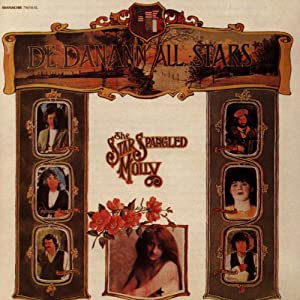

In [9]:
sample_idx = random.randint(0, 31470)
print(amazon_meta.iloc[sample_idx])

url = amazon_meta.imUrl[sample_idx]
response = requests.get(url)
Image.open(BytesIO(response.content))

# Download album images & Make rearranged csv

In [11]:
import csv

img_path = "./MuMu_dataset/album_imgs"
csv_path = "./MuMu_dataset/MuMu_dataset_all-label.csv"

headers = ['amazon_id', 'title', 'artist', 'img_path', 'genre']
total_data_num = len(amazon_meta)

with open(csv_path, 'w', encoding='UTF8') as c:
    writer = csv.writer(c)
    writer.writerow(headers)
        
    for idx in range(total_data_num):
        # iteration checking
        if idx % 3000 == 0:
            print("Downloaing...", int(idx/total_data_num*100), "%")
        
        # check avaliability of item
        item = amazon_meta.iloc[idx]
        amazon_id = item['amazon_id']
        try:
            tracks = single_data.loc[amazon_id]
            genre = np.array(tracks).reshape((-1, 5))[0][4]
        except:
            continue

        # download album image
        img_url = item['imUrl']
        r = requests.get(img_url)
        if r.status_code != 200:
            print("[Request Error]", r.status_code)
            continue

        # check no-img-lg
        _, f_name = os.path.split(img_url)
        if "no-img-lg" in f_name:
            print("[No Image Error]", f_name)
            continue

        # save image
        g_path = os.path.join(img_path, genre)
        if not os.path.exists(g_path):
            os.makedirs(g_path)
        f_path = os.path.join(g_path, f_name)
        with open(f_path, 'wb') as f:
            for chunk in r:
                f.write(chunk)
        f.close()

        # write csv
        row = [amazon_id, item['title'], item['artist'], f_path, genre]
        writer.writerow(row)
            
c.close()
print("Completed")

Downloaing... 0 %
Downloaing... 9 %
[No Image Error] no-img-lg._V192198674_.gif
Downloaing... 19 %
[No Image Error] no-img-lg._V192198674_.gif
[No Image Error] no-img-lg._V192198674_.gif
Downloaing... 28 %
[No Image Error] no-img-lg._V192198674_.gif
[No Image Error] no-img-lg._V192198674_.gif
[No Image Error] no-img-lg._V192198674_.gif
[No Image Error] no-img-lg._V192198674_.gif
[No Image Error] no-img-lg._V192198674_.gif
[No Image Error] no-img-lg._V192198674_.gif
[No Image Error] no-img-lg._V192198674_.gif
[No Image Error] no-img-lg._V192198674_.gif
[No Image Error] no-img-lg._V192198674_.gif
[No Image Error] no-img-lg._V192198674_.gif
Downloaing... 38 %
[No Image Error] no-img-lg._V192198674_.gif
[No Image Error] no-img-lg._V192198674_.gif
[No Image Error] no-img-lg._V192198674_.gif
[No Image Error] no-img-lg._V192198674_.gif
[No Image Error] no-img-lg._V192198674_.gif
[No Image Error] no-img-lg._V192198674_.gif
[No Image Error] no-img-lg._V192198674_.gif
[No Image Error] no-img-lg.

In [12]:
rearranged_data = pd.read_csv("./MuMu_dataset/MuMu_dataset_all-label.csv", sep=",", index_col=0)
rearranged_data

,title,artist,img_path,genre
amazon_id,,,,
B00000048F,Housefire,Byther Smith,./MuMu_dataset/album_imgs/Blues/51Axll75noL._S...,Blues
B00000058F,Getting to Know You,Mulgrew Miller,./MuMu_dataset/album_imgs/Jazz/21ADF1RHS6L.jpg,Jazz
B0000009P1,Can We Go Home Now,The Roches,./MuMu_dataset/album_imgs/Rock/51FSLPH5TZL._SY...,Rock
B000000BTN,Nasty,Cameo,./MuMu_dataset/album_imgs/R&B/51YW5DxA9XL._SY3...,R&B
B000000FKL,More Lovin' from Our Oven,Pansy Division,./MuMu_dataset/album_imgs/Alternative Rock/51A...,Alternative Rock
...,...,...,...,...
B00H7RETXS,NaN,Amos Milburn,./MuMu_dataset/album_imgs/Blues/51a503fat3L._S...,Blues
B00I18QNCW,NaN,Dispatch,./MuMu_dataset/album_imgs/Rock/51AF17P-XUL._SY...,Rock
B00J3D34QM,NaN,LCD Soundsystem,./MuMu_dataset/album_imgs/Alternative Rock/410...,Alternative Rock


# Analysis

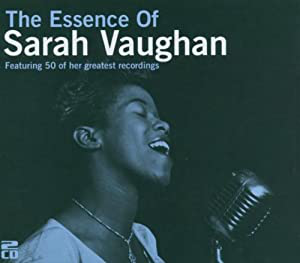

['Essence of Sarah Vaughan'] ['Sarah Vaughan']


In [19]:
# Show me the Random Jazz Album
sample = rearranged_data[rearranged_data['genre'] == 'Jazz'].sample()
with Image.open(sample.img_path.values[0]) as img:
    img.show()
print(sample.title.values, sample.artist.values)

In [20]:
genre_labels = rearranged_data['genre'].unique()
print("Total %d genre labels:\n" %(len(genre_labels)), genre_labels)

Total 16 genre labels:
 ['Blues' 'Jazz' 'Rock' 'R&B' 'Alternative Rock' 'Latin Music' 'Country'
 'Rap & Hip-Hop' 'Dance & Electronic' 'Reggae' 'Classical' 'Metal' 'Pop'
 'New Age' 'Folk' 'Gospel']


<AxesSubplot:>

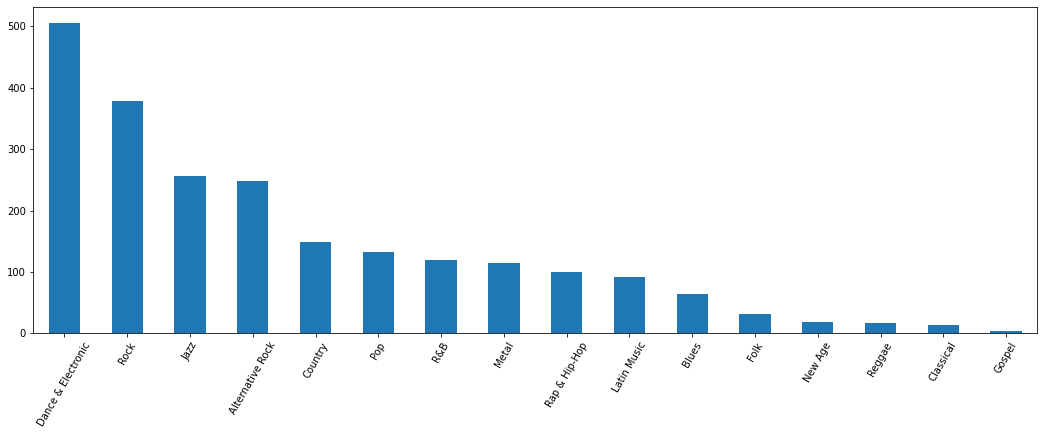

In [21]:
rearranged_data['genre'].value_counts().plot.bar(figsize=(18,6),rot=60)